In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from decimal import Decimal

In [3]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [4]:
df = pd.read_csv('E:/datasets/h1b.csv')

In [5]:
df.shape

(3002458, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
Unnamed: 0            int64
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [7]:
df.describe()

,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,3.002458e+06,3.002373e+06,3.002445e+06,2.895216e+06,2.895216e+06
mean,1.501230e+06,1.469984e+05,2.013855e+03,-9.213441e+01,3.816054e+01
std,8.667351e+05,5.287609e+06,1.680612e+00,1.965591e+01,4.672835e+00
min,1.000000e+00,0.000000e+00,2.011000e+03,-1.578583e+02,1.343719e+01
25%,7.506152e+05,5.437100e+04,2.012000e+03,-1.119261e+02,3.416536e+01
50%,1.501230e+06,6.502100e+04,2.014000e+03,-8.615862e+01,3.910312e+01
75%,2.251844e+06,8.143200e+04,2.015000e+03,-7.551381e+01,4.088374e+01
max,3.002458e+06,6.997607e+09,2.016000e+03,1.457298e+02,6.483778e+01


In [8]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [9]:
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [12]:
df.columns = [var.lower() for var in df.columns]

In [13]:
df.head()

,case_status,employer_name,soc_name,job_title,full_time_position,prevailing_wage,year,worksite,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [14]:
df.columns = ['case_status', 'companies', 'soc_name', 'job_title',
       'fulltpos', 'wages', 'year', 'worksite', 'lon',
       'lat']

In [15]:
df.head()

,case_status,companies,soc_name,job_title,fulltpos,wages,year,worksite,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


# TOP 15 COMPANIES 

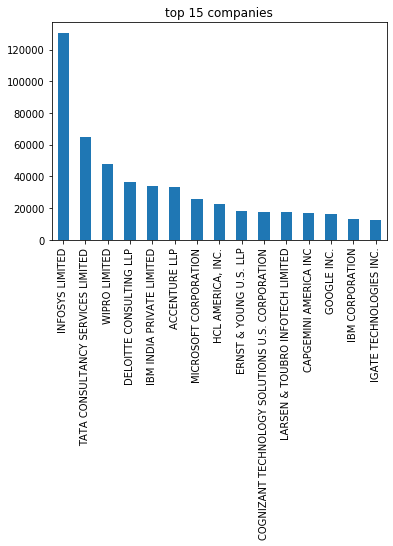

In [16]:
df.companies.value_counts()[:15].plot(kind='bar',title='top 15 companies')
plt.show()

In [17]:
cs = df.case_status.value_counts()[:4]

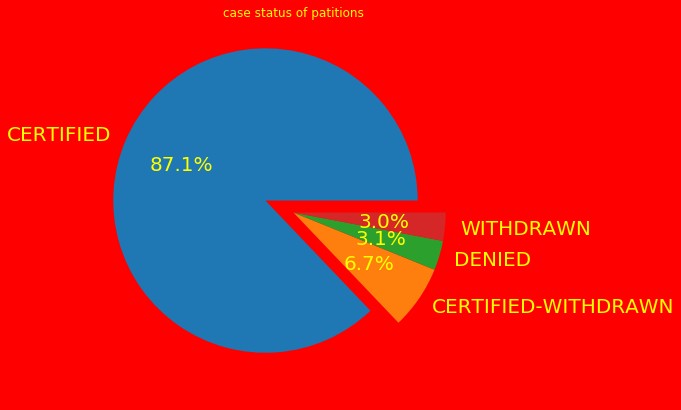

In [18]:
plt.figure(figsize=(15,7),facecolor='#ff0000')
plt.rcParams['text.color'] = 'yellow'
plt.title('case status of patitions')
plt.pie(x=cs,labels=cs.index,autopct='%.1f%%',explode=[0.2,0,0,0],textprops={'fontsize':20})
plt.show()

In [19]:
df.head()

,case_status,companies,soc_name,job_title,fulltpos,wages,year,worksite,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


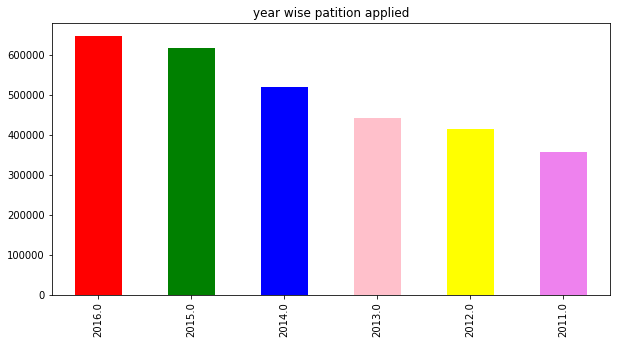

In [20]:
plt.figure(figsize=(10,5))
plt.rcParams['text.color'] = 'black'
df.year.value_counts().plot(kind='bar',title='year wise patition applied',colors=['r','g','b','pink','yellow','violet'])

plt.show()

In [21]:
df.head()

,case_status,companies,soc_name,job_title,fulltpos,wages,year,worksite,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [22]:
df.drop('lon',axis=1,inplace=True)
df.drop('lat',axis=1,inplace=True)

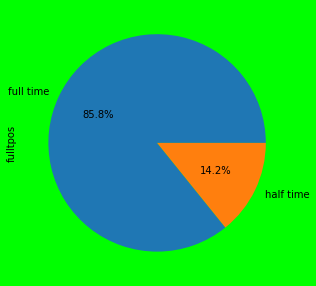

In [23]:
plt.figure(figsize=(10,5),facecolor='lime')
df.fulltpos.value_counts().plot(kind='pie',autopct='%.1f%%',labels=['full time','half time'])
plt.show()

In [24]:
df.head()

,case_status,companies,soc_name,job_title,fulltpos,wages,year,worksite
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI"


In [25]:
df['worksite'] = df.worksite.apply(lambda x : x.split(',')[1])

In [26]:
df.head()

,case_status,companies,soc_name,job_title,fulltpos,wages,year,worksite
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,MICHIGAN
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,TEXAS
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,NEW JERSEY
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,COLORADO
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,MISSOURI


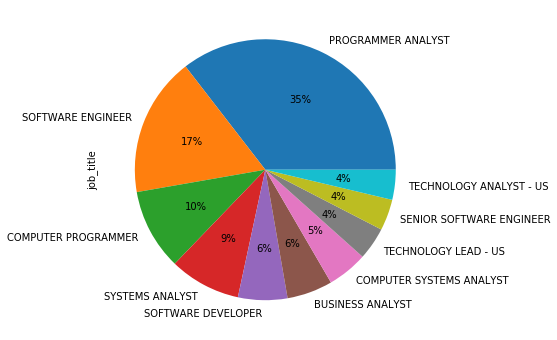

In [27]:
plt.figure(figsize=(15,6))
df.job_title.value_counts()[:10].plot(kind='pie',autopct='%.f%%')
plt.show()

In [28]:
df.head()

,case_status,companies,soc_name,job_title,fulltpos,wages,year,worksite
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,MICHIGAN
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,TEXAS
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,NEW JERSEY
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,COLORADO
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,MISSOURI


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 8 columns):
case_status    object
companies      object
soc_name       object
job_title      object
fulltpos       object
wages          float64
year           float64
worksite       object
dtypes: float64(2), object(6)
memory usage: 183.3+ MB


In [32]:
top_wages = df.nlargest(10,'wages')['companies']

In [38]:
top_wages

2163248    GUARDIAN HEALTHCARE PROVIDERS, INC.
2797982                       SCIVANTAGE, INC.
1673867                 DISCOVER PRODUCTS INC.
1819718                          IDEXCEL, INC.
2775906                    COMMONHEALTH ACTION
1547574                             ARKRIT LLC
1668384        HOWARD HUGHES MEDICAL INSTITUTE
1805875                            GOOGLE INC.
2796071                    ICAP CORPORATES LLC
1698325                 SAN LUIS VALLEY HEALTH
Name: companies, dtype: object

In [43]:
top_wages = df.nlargest(10,'wages')[['wages','companies']].set_index('wages')

In [48]:
top_wages

,companies
wages,
6.997607e+09,"GUARDIAN HEALTHCARE PROVIDERS, INC."
1.007814e+09,"SCIVANTAGE, INC."
8.201323e+08,DISCOVER PRODUCTS INC.
7.099999e+08,"IDEXCEL, INC."
6.579000e+08,COMMONHEALTH ACTION
6.169317e+08,ARKRIT LLC
4.134726e+08,HOWARD HUGHES MEDICAL INSTITUTE
4.103154e+08,GOOGLE INC.
4.066379e+08,ICAP CORPORATES LLC


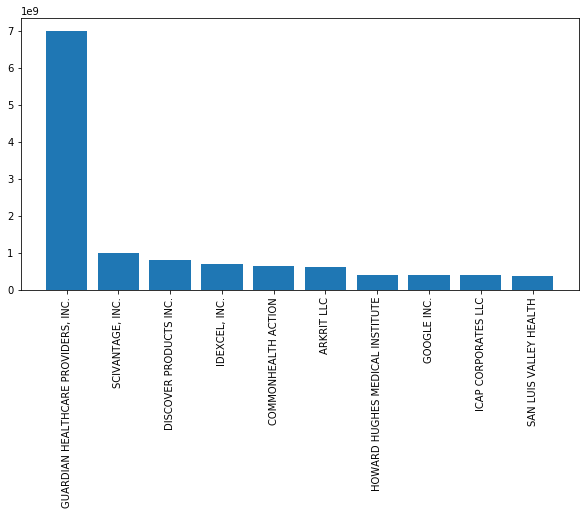

In [49]:
plt.figure(figsize=(10,5))
plt.bar(x=top_wages.companies,height=top_wages.index)
plt.xticks(rotation=90)
plt.show()

In [50]:
df.head()

,case_status,companies,soc_name,job_title,fulltpos,wages,year,worksite
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,MICHIGAN
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,TEXAS
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,NEW JERSEY
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,COLORADO
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,MISSOURI


In [55]:
top_worksite = df.worksite.value_counts()[:10]

In [61]:
denied_workiste = df[df.case_status == 'DENIED']['worksite'].value_counts()[:10]

In [92]:
df[df.case_status== 'DENIED']['worksite'].value_counts()[:10]

 CALIFORNIA       17740
 NEW YORK         12622
 TEXAS             8592
 FLORIDA           5577
 NEW JERSEY        4913
 ILLINOIS          3945
 MASSACHUSETTS     3629
 VIRGINIA          2854
 GEORGIA           2756
 PENNSYLVANIA      2745
Name: worksite, dtype: int64

In [63]:
top_worksite

 CALIFORNIA       559942
 TEXAS            294455
 NEW YORK         291412
 NEW JERSEY       214078
 ILLINOIS         160814
 MASSACHUSETTS    116466
 PENNSYLVANIA     109960
 FLORIDA          105773
 GEORGIA          103168
 WASHINGTON       102801
Name: worksite, dtype: int64

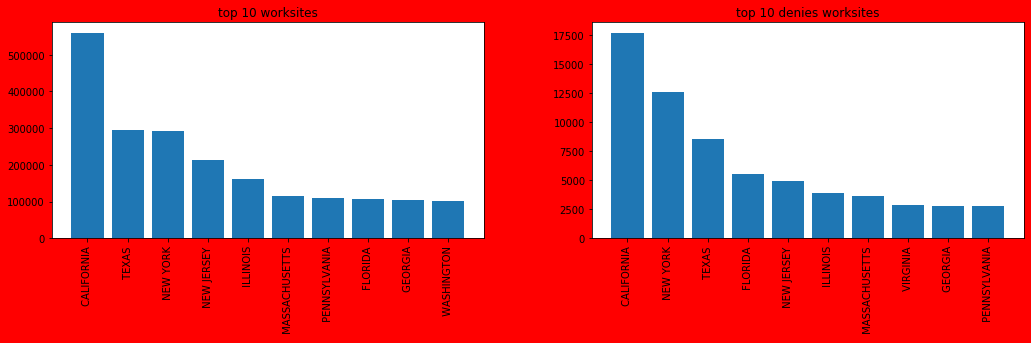

In [93]:
fig = plt.figure(figsize=(15,6),facecolor='red')

ax1 = fig.add_axes([0,0,0.4,0.5]) # left,bottom,width,height
ax2 = fig.add_axes([0.5,0,0.4,0.5])

ax1.bar(x=top_worksite.index,height=top_worksite[:])
ax1.set_xticklabels(labels=top_worksite.index,rotation=90)
ax1.set_title('top 10 worksites')

ax2.bar(x=denied_workiste.index,height=denied_workiste[:])
ax2.set_xticklabels(labels=denied_workiste.index,rotation=90)
ax2.set_title('top 10 denies worksites')

plt.show()

In [99]:
df[df.job_title == 'BUSINESS ANALYST']

,case_status,companies,soc_name,job_title,fulltpos,wages,year,worksite
4600,CERTIFIED,"GLOBAL TELECOM GROUP, INC.",MARKETING MANAGERS,BUSINESS ANALYST,N,64189.0,2016.0,VIRGINIA
9859,WITHDRAWN,NIIT TECHNOLOGIES LIMITED,COMPUTER AND INFORMATION SYSTEMS MANAGERS,BUSINESS ANALYST,Y,71600.0,2016.0,NEW YORK
10174,CERTIFIED,CAPGEMINI AMERICA INC,COMPUTER AND INFORMATION SYSTEMS MANAGERS,BUSINESS ANALYST,N,55973.0,2016.0,NEW JERSEY
14247,CERTIFIED,CITIGROUP GLOBAL MARKETS INC.,FINANCIAL MANAGERS,BUSINESS ANALYST,Y,147805.0,2016.0,NEW YORK
16938,CERTIFIED,"INSTITUTIONAL SHAREHOLDER SERVICES, INC.",COMPENSATION AND BENEFITS MANAGERS,BUSINESS ANALYST,N,59700.0,2016.0,MARYLAND
20498,CERTIFIED,SIRI INFOSOLUTIONS INC.,MEDICAL AND HEALTH SERVICES MANAGERS,BUSINESS ANALYST,Y,70346.0,2016.0,KENTUCKY
20500,CERTIFIED,SIRI INFOSOLUTIONS INC.,MEDICAL AND HEALTH SERVICES MANAGERS,BUSINESS ANALYST,Y,70346.0,2016.0,KENTUCKY
23135,CERTIFIED,STATE STREET BANK AND TRUST COMPANY,COMPLIANCE OFFICERS,BUSINESS ANALYST,N,56722.0,2016.0,MASSACHUSETTS
23250,CERTIFIED,TYSON FOODS INC.,COMPLIANCE OFFICERS,BUSINESS ANALYST,N,48173.0,2016.0,ARKANSAS
23304,CERTIFIED,IMEDGLOBAL CORPORATION,COMPLIANCE OFFICERS,BUSINESS ANALYST,N,67018.0,2016.0,NEW JERSEY


In [107]:
df.job_title.unique().tolist()

['POSTDOCTORAL RESEARCH FELLOW',
 'CHIEF OPERATING OFFICER',
 'CHIEF PROCESS OFFICER',
 'REGIONAL PRESIDEN, AMERICAS',
 'PRESIDENT MONGOLIA AND INDIA',
 'EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDENT, LATIN AMERI',
 'CHIEF OPERATIONS OFFICER',
 'PRESIDENT',
 'CHIEF INFORMATION OFFICER, HEINZ NORTH AMERICA',
 'VICE PRESIDENT AND CHIEF HUMAN RESOURCES OFFICER',
 'TREASURER AND COO',
 'CHIEF COMMERCIAL OFFICER',
 'BOARD MEMBER',
 'CHIEF FINANCIAL OFFICER',
 'VICE PRESIDENT OF FINANCE',
 'GENERAL MANAGER, OPERATIONS',
 'CEO',
 'PRESIDENT, NORTHEAST REGION',
 'CHIEF OPERATING OFFICER (COO)',
 'CHIEF EXECUTIVE OFFICER',
 'CHIEF BUSINESS OFFICER',
 'VICE PRESIDENT OF ENGINEERING',
 'EXECUTIVE DIRECTOR',
 'VICE PRESIDENT, BUSINESS DEVELOPMENT',
 'HEAD OF US SALES',
 'VICE PRESIDENT OF OPERATIONS',
 'VICE PRESIDENT, FINANCE AND OPERATIONS ANALYSIS',
 'ACCOUNT DIRECTOR',
 'TECHNICAL DIRECTOR',
 'SVP BUSINESS OPERATIONS AND DEVELOPMENT',
 'CHIEF MEDICAL OFFICER',
 'ASSISTANT VICE PRESIDENT, BUS

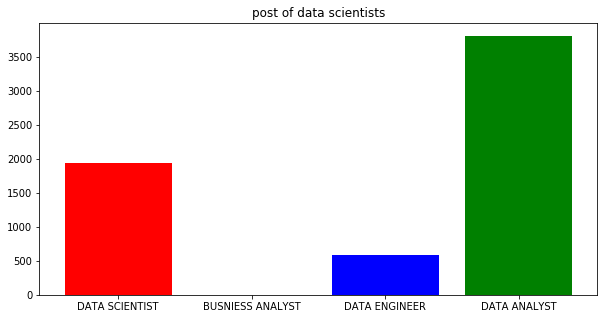

In [117]:
jobs = ['DATA SCIENTIST','BUSNIESS ANALYST','DATA ENGINEER','DATA ANALYST']
total = []

for var in jobs:
    t = df[df.job_title == var]['job_title'].count()
    total.append(t)
    
plt.figure(figsize=(10,5))
plt.bar(x=jobs,height=total,color=['r','y','b','g'])
plt.title('post of data scientists')
plt.show()

In [114]:
df[df.job_title == 'DATA SCIENTIST']['job_title'].count()

1932